<a href="https://colab.research.google.com/github/hunterpozzebon/15_Datathon5_CHL5230/blob/main/15_CHL5230_F23_Datathon5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datathon 5 - Team 15



# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from tqdm import tqdm
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

import warnings
warnings.filterwarnings('ignore')

# Import Data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving mhealth.csv to mhealth.csv


In [34]:
file_path = 'mhealth.csv'
mhealth_data = pd.read_csv(file_path)
mhealth = mhealth_data
mhealth_data.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1


# Data Engineering

In [35]:
mhealth['Activity_YN'] = mhealth['Activity'].apply(lambda x: 0 if x == 0 else 1)
mhealth['Activity_YN'].value_counts()

0    720946
1    279053
Name: Activity_YN, dtype: int64

In [12]:
mhealth.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject,Activity_YN
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1,0
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1,0
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1,0
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1,0
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1,0


### Column List

In [13]:
selected_columns_for_analysis = ['alx', 'aly', 'alz','glx', 'gly', 'glz','arx', 'ary', 'arz','grx', 'gry', 'grz']
coords = ['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx', 'gry', 'grz']

# Expolaratory Data Analysis

In [5]:
mhealth.shape

(999999, 14)

In [6]:
mhealth.groupby('subject').apply(len)

subject
subject1    161280
subject2    130561
subject3    122112
subject4    116736
subject5    119808
subject6     98304
subject7    104448
subject8    129024
subject9     17726
dtype: int64

In [8]:
print("Smallest Length:", mhealth.groupby('subject').apply(len).min())
print("Largest Length:", mhealth.groupby('subject').apply(len).max())
print("Average Length:", mhealth.groupby('subject').apply(len).mean())

Smallest Length: 17726
Largest Length: 161280
Average Length: 111111.0


In [7]:
mhealth.groupby('Activity').apply(len)

Activity
0     720946
1      27648
2      25406
3      24576
4      24576
5      24576
6      22990
7      23809
8      23501
9      24576
10     24576
11     24576
12      8243
dtype: int64

## Missingness Analysis

In [9]:
mhealth.isnull().sum()

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

In [10]:
# Calculating the missing threshold based on the sampled data
missing_threshold = 0.5 * len(mhealth_data)

# Identifying columns with more than 50% missing values in the sampled data
columns_to_drop = mhealth_data.columns[mhealth_data.isnull().sum() > missing_threshold]

# Calculating the number of missing values in each column of the sampled dataset
missing_values = mhealth_data.isnull().sum()

missing_values, columns_to_drop

(alx         0
 aly         0
 alz         0
 glx         0
 gly         0
 glz         0
 arx         0
 ary         0
 arz         0
 grx         0
 gry         0
 grz         0
 Activity    0
 subject     0
 dtype: int64,
 Index([], dtype='object'))

No missing values

## Data Visualization

### Activity Visualization

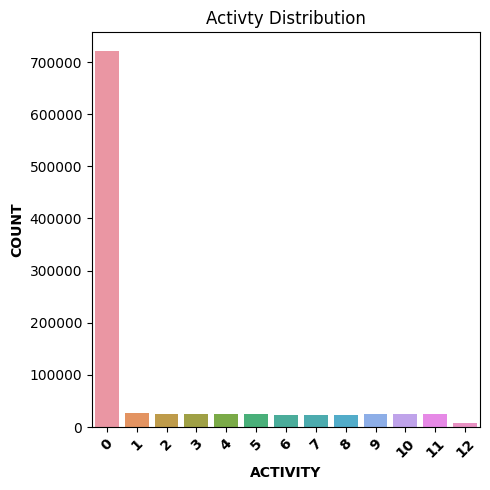

In [28]:
# Race Distribution with updated color palette
plt.figure(figsize=(5, 5))
sns.countplot(x='Activity', data= mhealth_data)
plt.title('Activty Distribution')
plt.xlabel('ACTIVITY', fontweight='bold')
plt.ylabel('COUNT', fontweight='bold')
plt.xticks(rotation=45, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
updated_race_distribution_fig = plt.gcf()
plt.show()

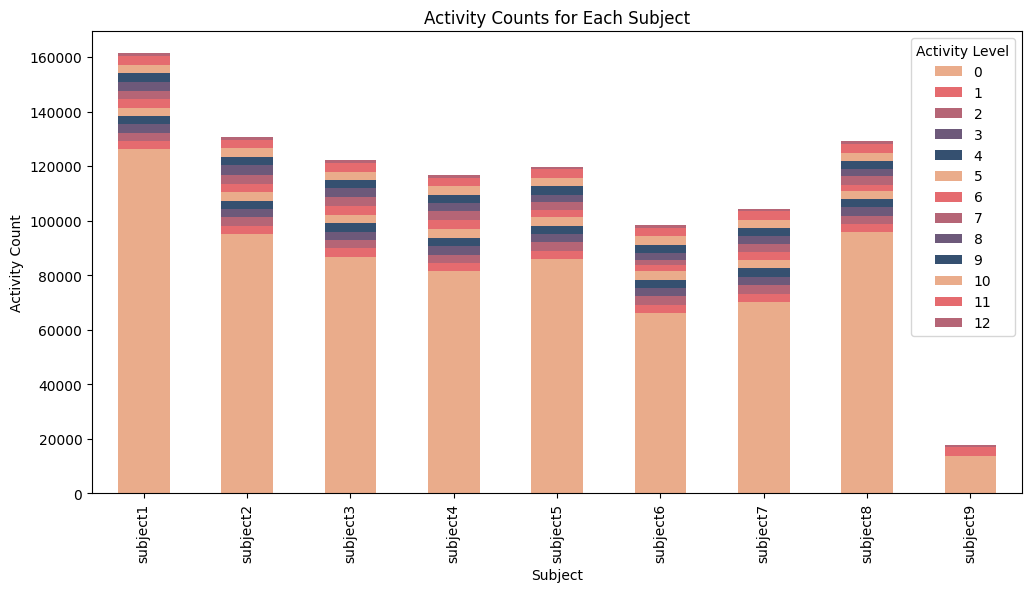

In [29]:
# Activity by patient all activities

activity_counts = mhealth.groupby('subject')['Activity'].value_counts().unstack()

activity_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Activity Counts for Each Subject')
plt.xlabel('Subject')
plt.ylabel('Activity Count')
plt.legend(title='Activity Level', loc='upper right')
plt.show()

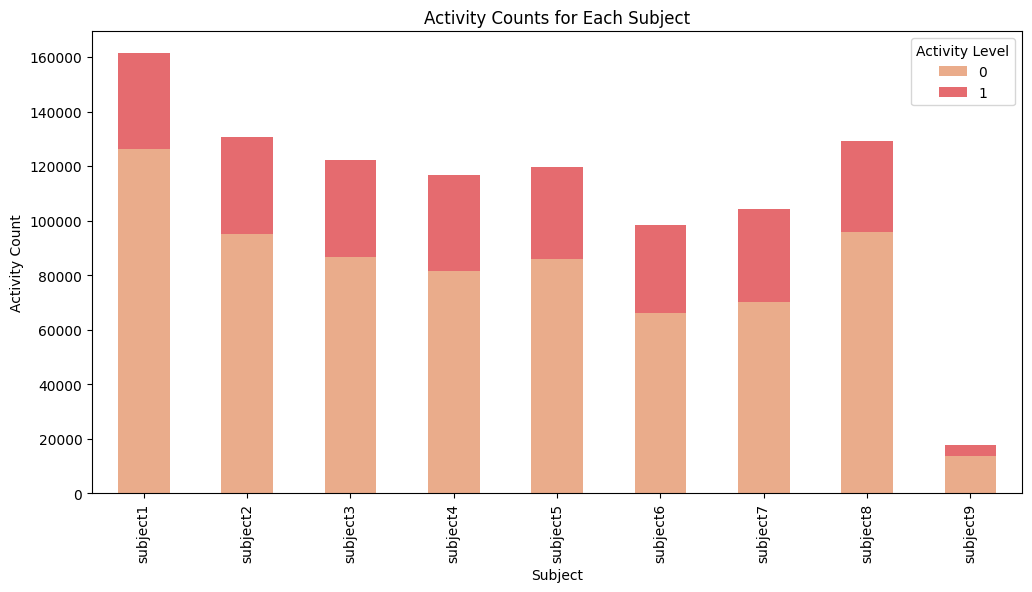

In [30]:
# Activity by patient activity vs no activity

activityYN_counts = mhealth.groupby('subject')['Activity_YN'].value_counts().unstack()

activityYN_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Activity Counts for Each Subject')
plt.xlabel('Subject')
plt.ylabel('Activity Count')
plt.legend(title='Activity Level', loc='upper right')
plt.show()

### Coordinate Visualization

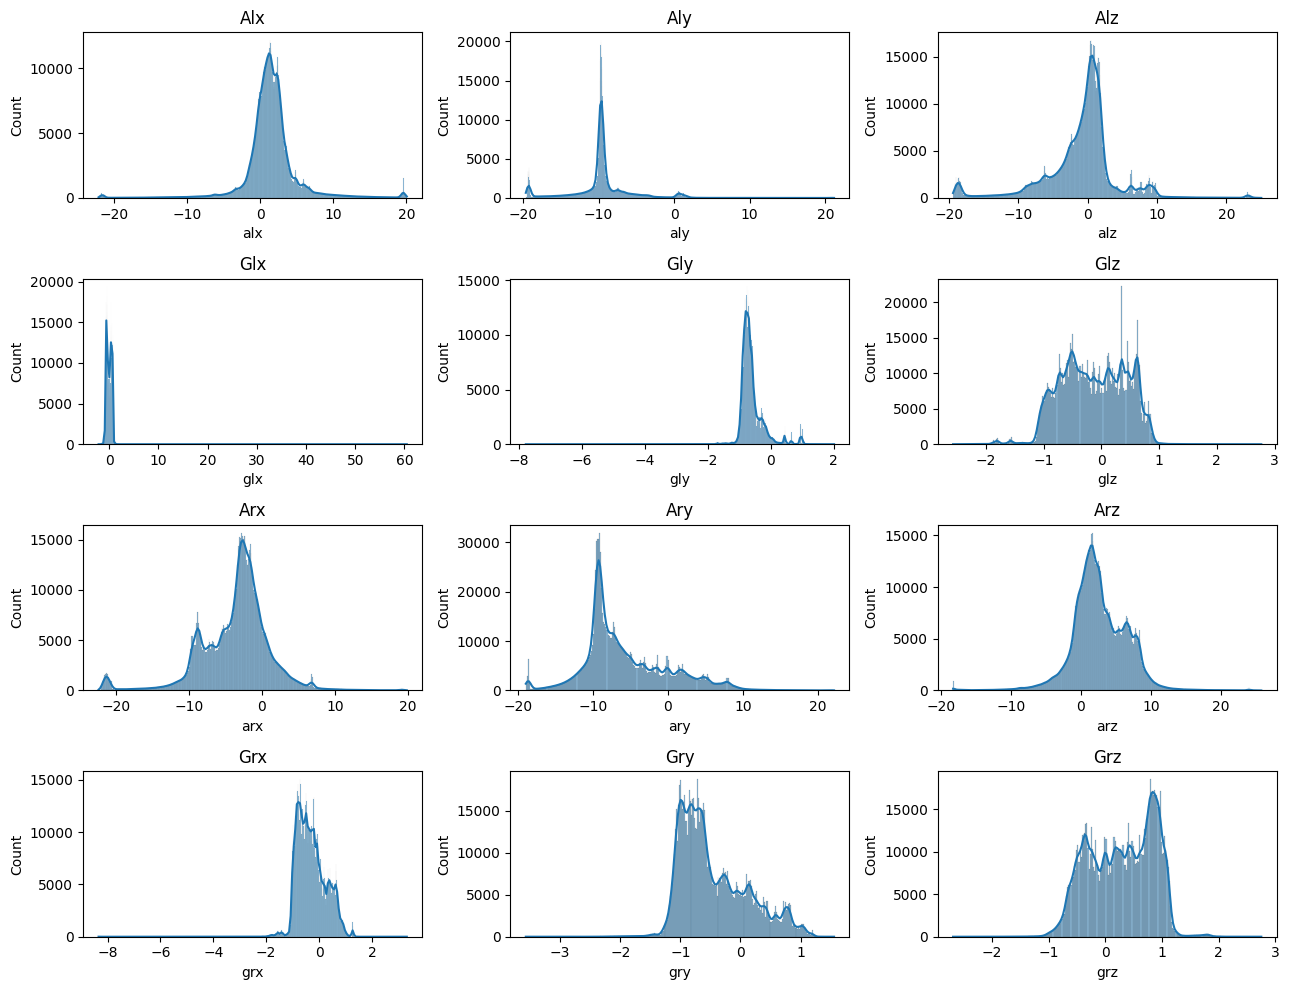

In [16]:
# Visualization of Coordinates

# Update the list of meaningful columns based on the available columns in the dataset

# Create a grid of subplots with 3 rows and 3 columns
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(13, 10))

# Loop over each selected feature to create a subplot for each
for i, column in enumerate(selected_columns_for_analysis):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // 3
    y = i % 3

    # Plot a histogram of the feature split by the 'readmitted' class
    sns.histplot(mhealth_data, x=column, kde=True, palette='rocket', ax=axs[x][y],
                 multiple='stack')
    axs[x][y].set_title(column.replace('_', ' ').title())

# Adjust the layout and display all the subplots
plt.tight_layout()
plt.show()

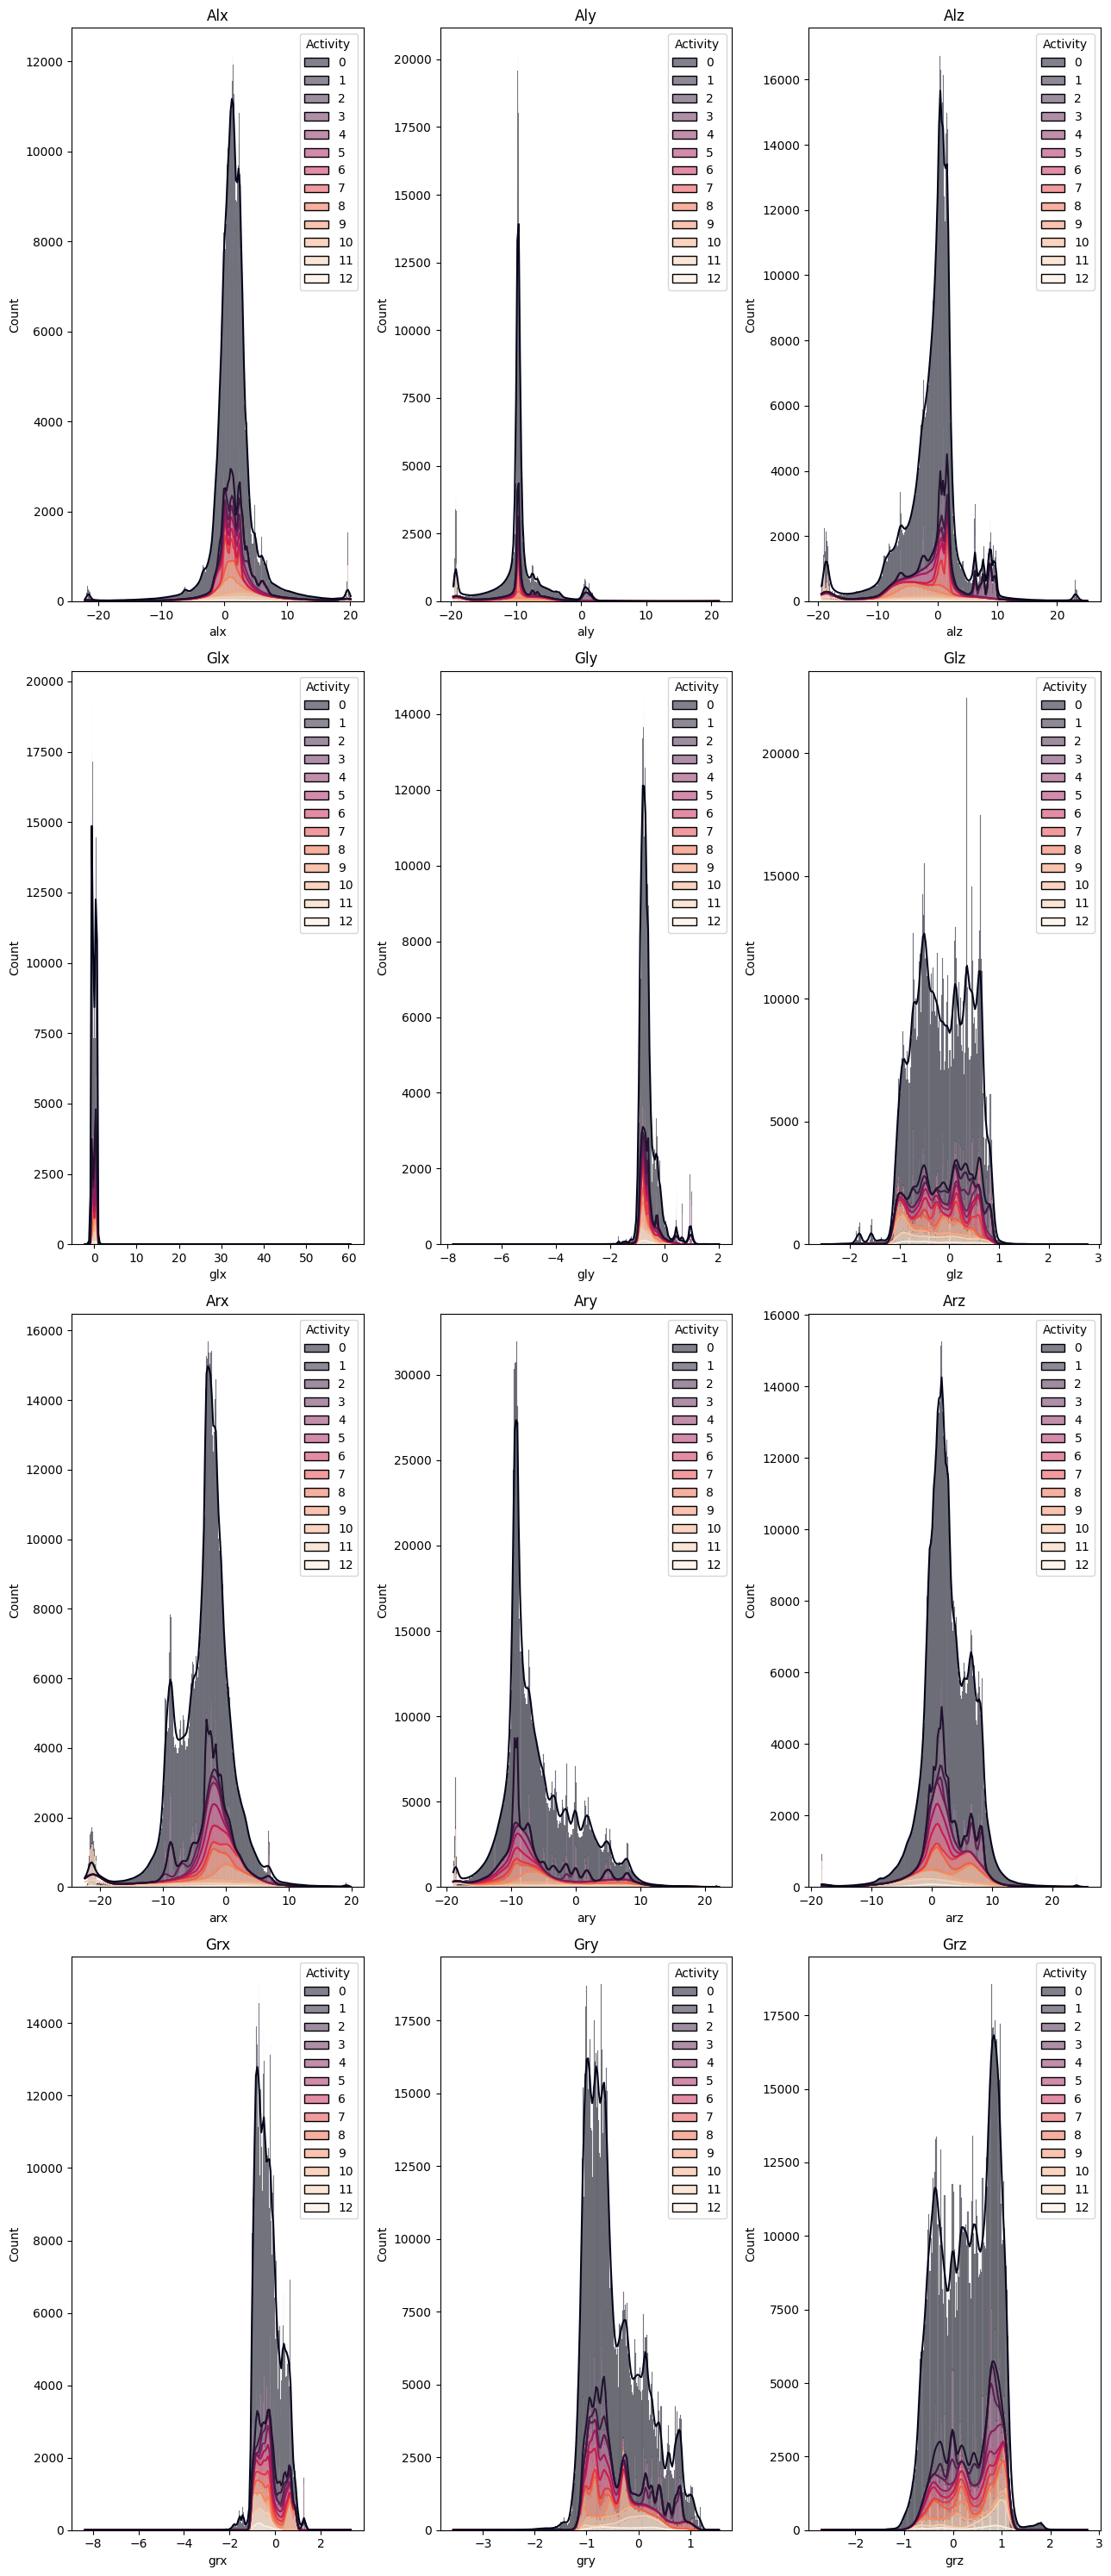

In [17]:
# Visualization by Activity Level
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(13, 30))

# Loop over each selected feature to create a subplot for each
for i, column in enumerate(coords):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // 3
    y = i % 3

    # Plot a histogram of the feature split by the 'Activity' class
    sns.histplot(mhealth, x=column, hue='Activity', kde=True, palette='rocket', ax=axs[x][y],
                 multiple='stack')
    axs[x][y].set_title(column.replace('_', ' ').title())

# Adjust the layout and display all the subplots
plt.tight_layout()
plt.show()

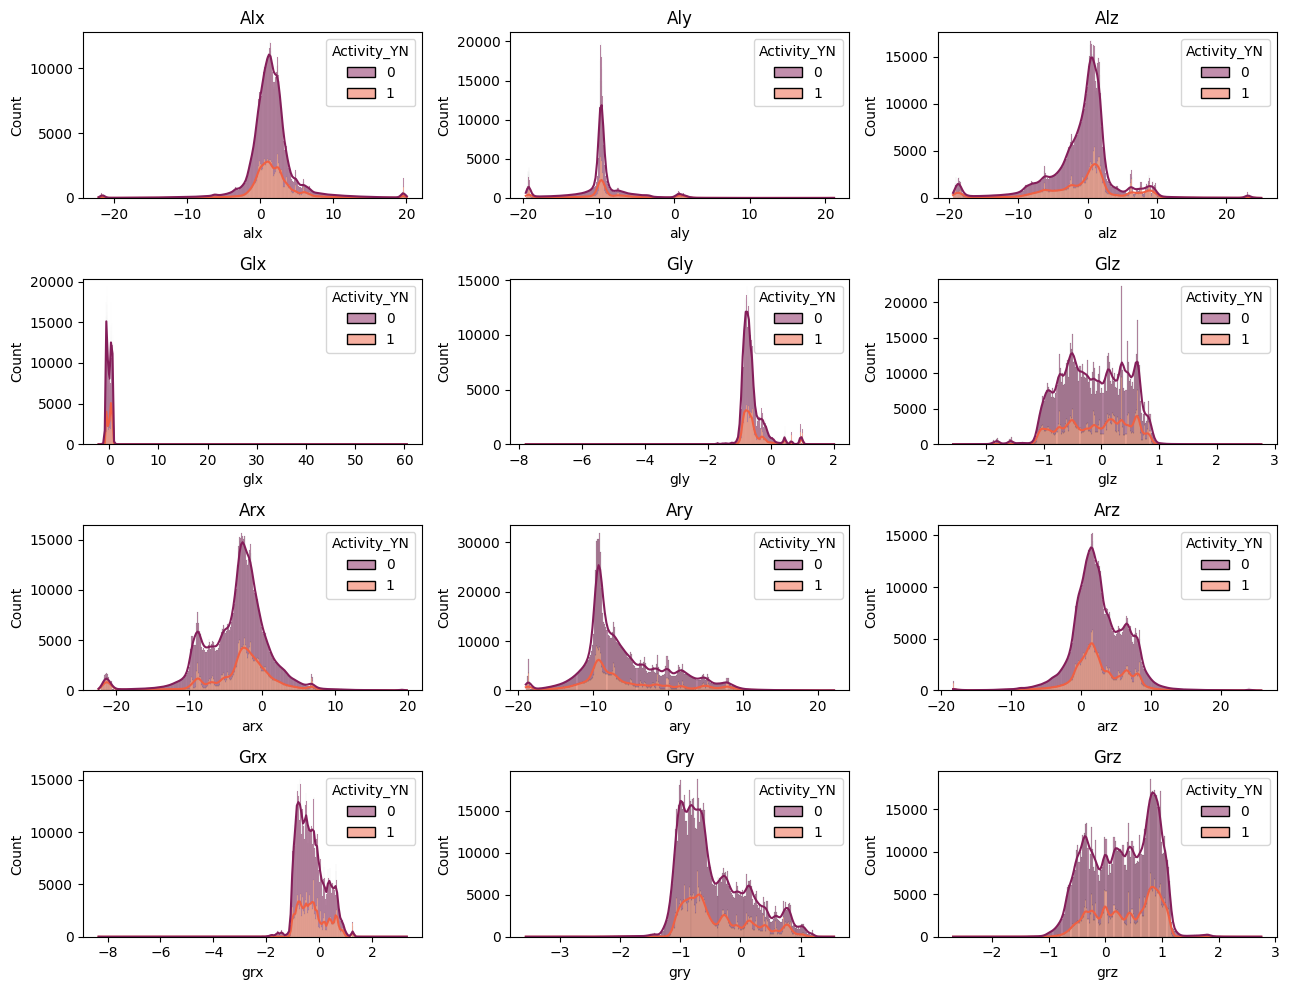

In [18]:
# Visualization by Activity None vs Any

fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(13, 10))

coords = ['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx', 'gry', 'grz']

# Loop over each selected feature to create a subplot for each
for i, column in enumerate(coords):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // 3
    y = i % 3

    # Plot a histogram of the feature split by the 'Activity' class
    sns.histplot(mhealth, x=column, hue='Activity_YN', kde=True, palette='rocket', ax=axs[x][y],
                 multiple='stack')
    axs[x][y].set_title(column.replace('_', ' ').title())

# Adjust the layout and display all the subplots
plt.tight_layout()
plt.show()

### Correlation Visualization

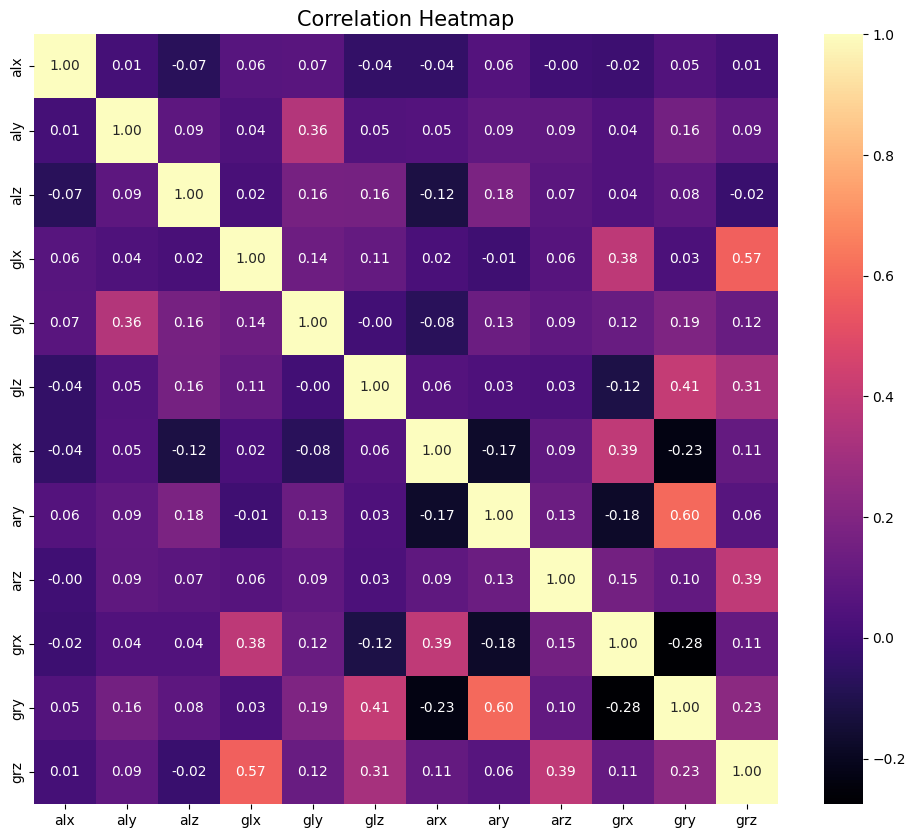

In [19]:
# Recalculate the correlation matrix without the '_id' columns
correlation_matrix = mhealth_data[coords].corr()

# Plot the updated correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='magma')
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

# Splitting the Data

In [50]:
# Grouping by 'patient_nbr' and creating a list of dataframes, one per group
grouped = mhealth_data.groupby('subject')
grouped_dfs = [group for _, group in grouped]

# Splitting the groups into training and test sets with an 80:20 ratio
train_groups, test_groups = train_test_split(grouped_dfs, test_size=0.2, random_state=42)

# Reassembling the training and test datasets from the groups
train_df_f = pd.concat(train_groups)
test_df_f = pd.concat(test_groups)

# Displaying the shape of the training and test sets
train_df_f_shape = train_df_f.shape
test_df_f_shape = test_df_f.shape

train_df_f_shape, test_df_f_shape

((740414, 15), (259585, 15))

# Normalizing the Data

In [51]:
# Identifying numerical columns (excluding 'patient_nbr' and 'readmitted')
numerical_columns = train_df_f.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('Activity')
numerical_columns.remove('Activity_YN')

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the training data and transforming both training and test data
train_df_f[numerical_columns] = scaler.fit_transform(train_df_f[numerical_columns])
test_df_f[numerical_columns] = scaler.transform(test_df_f[numerical_columns])

# Checking the first few rows of the normalized training data
train_df_f.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject,Activity_YN
650497,-0.552567,0.055747,-0.810059,0.578981,-0.800349,0.501238,-1.814050,0.678081,-0.577362,-0.556227,2.101663,0.012934,0,subject6,0
650498,-1.531305,0.104970,-0.369903,0.693642,-0.720535,0.533071,-1.213665,0.758524,-0.989728,-0.556227,2.101663,0.012934,0,subject6,0
650499,-1.634742,0.162005,-0.446628,0.693642,-0.720535,0.533071,-0.665509,0.721946,-1.405218,-0.770194,1.968628,-0.202877,0,subject6,0
650500,-1.058302,0.102992,-0.337213,0.693642,-0.720535,0.533071,-0.339275,0.722070,-1.640731,-0.770194,1.968628,-0.202877,0,subject6,0
650501,-1.119704,0.167596,-0.387926,0.601930,-0.704601,0.653347,-0.163938,0.695687,-1.610853,-0.770194,1.968628,-0.202877,0,subject6,0


# Model with All Activity Levels

In [52]:
train_df = train_df_f.drop('Activity_YN', axis = 1, inplace = False)
test_df = test_df_f.drop('Activity_YN', axis = 1, inplace = False)

In [53]:
train_df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
650497,-0.552567,0.055747,-0.810059,0.578981,-0.800349,0.501238,-1.814050,0.678081,-0.577362,-0.556227,2.101663,0.012934,0,subject6
650498,-1.531305,0.104970,-0.369903,0.693642,-0.720535,0.533071,-1.213665,0.758524,-0.989728,-0.556227,2.101663,0.012934,0,subject6
650499,-1.634742,0.162005,-0.446628,0.693642,-0.720535,0.533071,-0.665509,0.721946,-1.405218,-0.770194,1.968628,-0.202877,0,subject6
650500,-1.058302,0.102992,-0.337213,0.693642,-0.720535,0.533071,-0.339275,0.722070,-1.640731,-0.770194,1.968628,-0.202877,0,subject6
650501,-1.119704,0.167596,-0.387926,0.601930,-0.704601,0.653347,-0.163938,0.695687,-1.610853,-0.770194,1.968628,-0.202877,0,subject6


## Class Imbalance

In [54]:
# Checking the class distribution in the 'readmitted' column of the training set
class_distribution = train_df.groupby('subject').apply(lambda x : x['Activity']).value_counts()
class_distribution

0     530225
1      21504
2      19262
3      18432
4      18432
9      18432
10     18432
11     18432
5      18432
6      17665
8      17511
7      17460
12      6195
Name: Activity, dtype: int64

In [55]:
groups_class_0 = train_df[train_df['Activity']==0]
groups_class_1 = train_df[train_df['Activity']==1]
groups_class_2 = train_df[train_df['Activity']==2]
groups_class_3 = train_df[train_df['Activity']==3]
groups_class_4 = train_df[train_df['Activity']==4]
groups_class_5 = train_df[train_df['Activity']==5]
groups_class_6 = train_df[train_df['Activity']==6]
groups_class_7 = train_df[train_df['Activity']==7]
groups_class_8 = train_df[train_df['Activity']==8]
groups_class_9 = train_df[train_df['Activity']==9]
groups_class_10 = train_df[train_df['Activity']==10]
groups_class_11 = train_df[train_df['Activity']==11]
groups_class_12 = train_df[train_df['Activity']==12]

In [56]:
# Oversampling the minority group (class 12) and Undersampling the majority group (class 0)
# Using resample to duplicate records in groups_class_1 to match the number of records in groups_class_0
undersampled_groups_class_0 = resample(groups_class_0, replace=True, n_samples=len(groups_class_1), random_state=42)
oversampled_groups_class_12 = resample(groups_class_12, replace=True, n_samples=len(groups_class_11), random_state=42)

# Combining the oversampled minority class groups with the majority class group
# This results in a balanced dataset with an equal number of records for each class
train_df_balanced = pd.concat([undersampled_groups_class_0, groups_class_1, groups_class_2,groups_class_3,groups_class_4,groups_class_5, groups_class_6,groups_class_7,groups_class_8, groups_class_9, groups_class_10,
                         groups_class_11, oversampled_groups_class_12])


# Grouping by 'patient_nbr' and creating a list of dataframes, one per group
grouped = train_df_balanced.groupby('subject')
grouped_dfs = [group for _, group in grouped]


In [57]:
new_dfs = pd.concat(grouped_dfs)
train_df_balanced = new_dfs
train_df_balanced.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
80742,-0.365884,0.852903,-0.483069,-0.793071,1.455142,-1.285144,0.386617,-0.077899,1.107204,0.110680,-1.301818,0.158107,0,subject1
93788,-0.664074,-0.129033,-0.704657,-0.808356,-0.869503,-0.446779,-1.068226,0.335987,-0.562174,-0.898584,-0.038027,-1.438831,0,subject1
65980,0.597283,-0.099245,-0.651281,0.716590,-0.890768,0.430495,-1.125128,1.148594,-1.244957,-0.609719,2.341870,-0.108717,0,subject1
102265,0.080762,0.015949,-0.152478,1.469505,0.167825,-0.726240,0.196269,-0.299939,-1.999768,0.859616,-1.094852,0.122788,0,subject1
33687,0.294212,0.042367,0.205665,-0.575224,-0.928024,-0.694407,-1.423057,1.820144,-0.037691,-0.788036,1.957542,-1.317198,0,subject1


In [58]:
train_df_balanced.shape
class_distribution = train_df_balanced.groupby('subject').apply(lambda x : x['Activity']).value_counts()
class_distribution

0     21504
1     21504
2     19262
3     18432
4     18432
5     18432
9     18432
10    18432
11    18432
12    18432
6     17665
8     17511
7     17460
Name: Activity, dtype: int64

## Create Sequences

In [59]:
def create_sequences(data, sequence_length=100):
    sequences = []
    output = []
    for i in range(0, len(data) - sequence_length + 1, sequence_length):
        sequence = data[i:i + sequence_length]
        # Assuming 'Activity' is the target variable and is the same for the entire sequence
        label = sequence['Activity'].iloc[0]
        sequences.append(sequence[coords].values)
        output.append(label)

    return np.array(sequences), np.array(output)

# Creating sequences for training and test data
X_train, y_train = create_sequences(train_df_balanced, sequence_length=100)
X_test, y_test = create_sequences(test_df, sequence_length=100)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2439, 100, 12), (2439,), (2595, 100, 12), (2595,))

## RNN

In [60]:
# Hyperparameters
input_size = X_train.shape[2]
hidden_size = 256  # Number of hidden units in RNN
num_classes = 13  # For 13-class classification
epochs = 100
learning_rate = 0.001
batch_size = 512
landa = 0.0001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(X_train, dtype=t.float32), t.tensor(y_train, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(X_test, dtype=t.float32), t.tensor(y_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.RNN(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
# rnn_layer2 = nn.RNN(hidden_size, hidden_size, batch_first=True)
# dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size // 2)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size  // 2, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
# optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
all_loss = []
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# Training loop
for epoch in range(epochs):

    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        # out, _ = rnn_layer2(out)
        # out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # loss = loss_fn(out, Y) + landa * l2_term
        loss = loss_fn(out, Y)
        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # max_iter -=1
        # if max_iter == 0:
        #     break
    all_loss += per_epoch_loss_list

    # Evaluation on training and validation data
    rnn_layer1.eval()
    # rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            # out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            # out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    # rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()

Epoch 0/100 ---> Train Accuracy: 30.13530135301353%, Validation Accuracy: 17.263969171483623%
Epoch 1/100 ---> Train Accuracy: 26.814268142681428%, Validation Accuracy: 8.246628131021195%
Epoch 2/100 ---> Train Accuracy: 32.30832308323083%, Validation Accuracy: 6.936416184971098%
Epoch 3/100 ---> Train Accuracy: 23.821238212382124%, Validation Accuracy: 4.585741811175337%
Epoch 4/100 ---> Train Accuracy: 27.060270602706026%, Validation Accuracy: 6.897880539499036%
Epoch 5/100 ---> Train Accuracy: 36.982369823698235%, Validation Accuracy: 10.289017341040463%
Epoch 6/100 ---> Train Accuracy: 40.09840098400984%, Validation Accuracy: 11.676300578034683%
Epoch 7/100 ---> Train Accuracy: 46.125461254612546%, Validation Accuracy: 12.10019267822736%
Epoch 8/100 ---> Train Accuracy: 47.39647396473965%, Validation Accuracy: 12.177263969171484%
Epoch 9/100 ---> Train Accuracy: 46.658466584665845%, Validation Accuracy: 11.63776493256262%
Epoch 10/100 ---> Train Accuracy: 50.55350553505535%, Valida

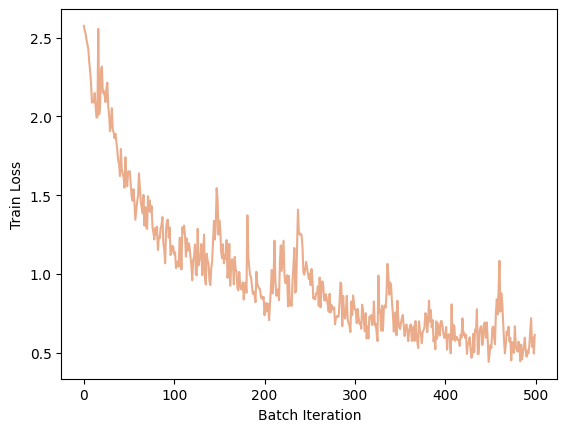

In [61]:
plt.plot([i for i in range(len(all_loss))], all_loss, label="Train")
plt.xlabel('Batch Iteration')
plt.ylabel('Train Loss')
plt.show()

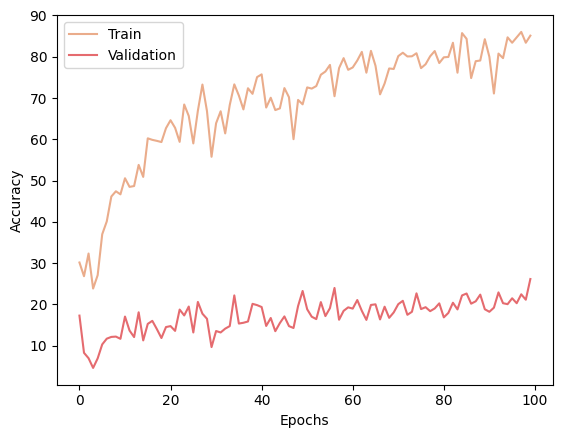

In [62]:
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## LTSMNN

In [64]:
# Hyperparameters
input_size = X_train.shape[2]
hidden_size = 256  # Number of hidden units in RNN
num_classes = 13  # For three-class classification
epochs = 20
learning_rate = 0.001
batch_size = 512
landa = 0.0001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(X_train, dtype=t.float32), t.tensor(y_train, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(X_test, dtype=t.float32), t.tensor(y_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.LSTM(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
# rnn_layer2 = nn.LSTM(hidden_size, hidden_size, batch_first=True)
# dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
optimizer = Adam(list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# Training loop
for epoch in range(epochs):
    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        # out, _ = rnn_layer2(out)
        # out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # loss = loss_fn(out, Y) + landa * l2_term
        loss = loss_fn(out, Y)

        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluation on training and validation data
    rnn_layer1.eval()
    # rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            # out, _ = rnn_layer2(out)
            # out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            # out, _ = rnn_layer2(out)
            # out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    # rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()

Epoch 0/20 ---> Train Accuracy: 26.650266502665026%, Validation Accuracy: 19.4990366088632%
Epoch 1/20 ---> Train Accuracy: 34.07134071340713%, Validation Accuracy: 10.90558766859345%
Epoch 2/20 ---> Train Accuracy: 38.04838048380484%, Validation Accuracy: 9.633911368015415%
Epoch 3/20 ---> Train Accuracy: 35.26035260352604%, Validation Accuracy: 9.556840077071291%
Epoch 4/20 ---> Train Accuracy: 43.21443214432144%, Validation Accuracy: 11.059730250481696%
Epoch 5/20 ---> Train Accuracy: 46.535465354653546%, Validation Accuracy: 11.021194605009635%
Epoch 6/20 ---> Train Accuracy: 55.96555965559656%, Validation Accuracy: 11.599229287090559%
Epoch 7/20 ---> Train Accuracy: 61.787617876178764%, Validation Accuracy: 13.94990366088632%
Epoch 8/20 ---> Train Accuracy: 63.181631816318166%, Validation Accuracy: 15.337186897880539%
Epoch 9/20 ---> Train Accuracy: 65.39565395653956%, Validation Accuracy: 16.72447013487476%
Epoch 10/20 ---> Train Accuracy: 68.92168921689218%, Validation Accuracy:

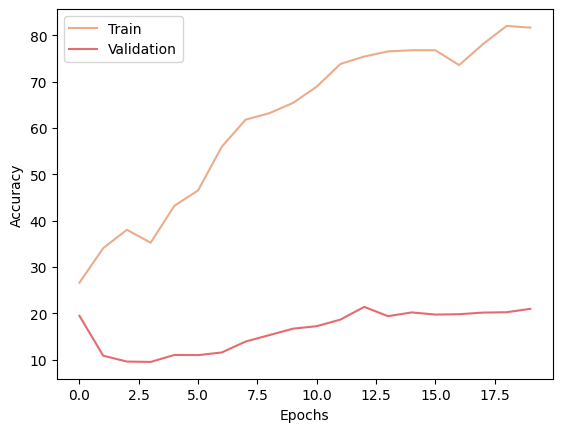

In [65]:
# Plot training and validation accuracy over epochs
import matplotlib.pyplot as plt
import seaborn as snsx
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

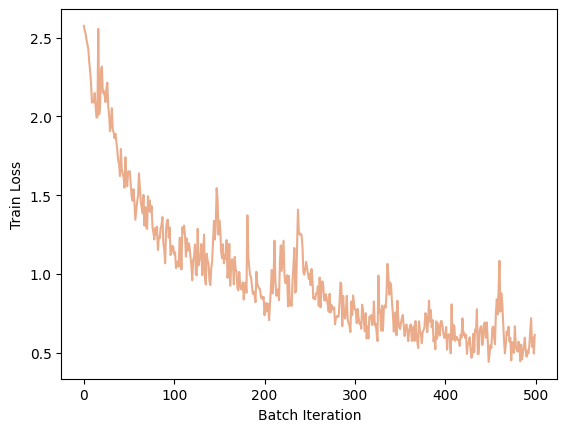

In [66]:
plt.plot([i for i in range(len(all_loss))], all_loss, label="Train")
plt.xlabel('Batch Iteration')
plt.ylabel('Train Loss')
plt.show()

# Model with Binary Activity Levels

In [68]:
train_df = train_df_f.drop('Activity', axis = 1, inplace = False)
test_df = test_df_f.drop('Activity', axis = 1, inplace = False)

In [69]:
train_df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,subject,Activity_YN
650497,-0.552567,0.055747,-0.810059,0.578981,-0.800349,0.501238,-1.814050,0.678081,-0.577362,-0.556227,2.101663,0.012934,subject6,0
650498,-1.531305,0.104970,-0.369903,0.693642,-0.720535,0.533071,-1.213665,0.758524,-0.989728,-0.556227,2.101663,0.012934,subject6,0
650499,-1.634742,0.162005,-0.446628,0.693642,-0.720535,0.533071,-0.665509,0.721946,-1.405218,-0.770194,1.968628,-0.202877,subject6,0
650500,-1.058302,0.102992,-0.337213,0.693642,-0.720535,0.533071,-0.339275,0.722070,-1.640731,-0.770194,1.968628,-0.202877,subject6,0
650501,-1.119704,0.167596,-0.387926,0.601930,-0.704601,0.653347,-0.163938,0.695687,-1.610853,-0.770194,1.968628,-0.202877,subject6,0


## Class Imbalance

In [70]:
groups_class_0 = train_df[train_df['Activity_YN']==0]
groups_class_1 = train_df[train_df['Activity_YN']==1]

In [71]:
# Oversampling the minority groups (class 1)
oversampled_groups_class_1 = resample(groups_class_1, replace=True, n_samples=len(groups_class_0), random_state=42)

# Combining the oversampled minority class groups with the majority class group
# This results in a balanced dataset with an equal number of records for each class
train_df_balanced = pd.concat([oversampled_groups_class_1, groups_class_0])


# Grouping by 'patient_nbr' and creating a list of dataframes, one per group
grouped = train_df_balanced.groupby('subject')
grouped_dfs = [group for _, group in grouped]

In [72]:
new_dfs = pd.concat(grouped_dfs)
train_df_balanced = new_dfs
train_df_balanced.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,subject,Activity_YN
76953,-0.635419,0.139274,-1.079003,1.645307,-0.098156,-0.018757,0.780788,0.560846,1.679600,1.615663,-0.208028,1.323459,subject1,1
21685,0.642286,2.799804,1.812556,0.865633,3.598923,0.812532,-0.794241,1.273456,0.894378,0.146347,2.097973,0.868278,subject1,1
160098,-0.209717,0.005426,-0.403117,-1.752379,-0.970582,0.235931,-0.183890,-0.972194,-0.505046,-1.073336,-0.074975,-1.478064,subject1,1
157697,-0.248997,0.105287,-0.718010,-0.399423,-0.747159,0.529542,-0.260580,-0.727636,-0.783932,-0.467069,0.845197,-1.387818,subject1,1
90711,0.948709,-0.539464,-0.298334,0.621026,-0.310946,-1.129506,-3.740277,3.822868,-0.674928,-0.620414,1.569507,0.970303,subject1,1


In [73]:
train_df_balanced.groupby('subject').apply(lambda x : x['Activity_YN']).value_counts()

1    530225
0    530225
Name: Activity_YN, dtype: int64

## Create Sequences

In [78]:
def create_sequences(data, sequence_length):
    sequences = []
    output = []
    for i in range(0, len(data) - sequence_length + 1, sequence_length):
        sequence = data[i:i + sequence_length]
        # Assuming 'Activity' is the target variable and is the same for the entire sequence
        label = sequence['Activity_YN'].iloc[0]
        sequences.append(sequence[coords].values)
        output.append(label)

    return np.array(sequences), np.array(output)

In [79]:
seq_length = int(100)

# Creating sequences for training and test data
X_train, y_train = create_sequences(train_df_balanced, sequence_length=seq_length)
X_test, y_test = create_sequences(test_df, sequence_length=seq_length)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10604, 100, 12), (10604,), (2595, 100, 12), (2595,))

## RNN

In [82]:
# Hyperparameters
input_size = X_train.shape[2]
hidden_size = 256  # Number of hidden units in RNN
num_classes = 2  # For two-class classification
epochs = 100
learning_rate = 0.00001
batch_size = 512
landa = 0.00001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(X_train, dtype=t.float32), t.tensor(y_train, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(X_test, dtype=t.float32), t.tensor(y_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.RNN(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
# rnn_layer2 = nn.RNN(hidden_size, hidden_size, batch_first=True)
# dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size // 2)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size  // 2, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
# optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
all_loss = []
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# Training loop
for epoch in range(epochs):

    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        # out, _ = rnn_layer2(out)
        # out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # loss = loss_fn(out, Y) + landa * l2_term
        loss = loss_fn(out, Y)
        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # max_iter -=1
        # if max_iter == 0:
        #     break
    all_loss += per_epoch_loss_list

    # Evaluation on training and validation data
    rnn_layer1.eval()
    # rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            # out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            # out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    # rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()

Epoch 0/100 ---> Train Accuracy: 54.74349302150132%, Validation Accuracy: 62.23506743737958%
Epoch 1/100 ---> Train Accuracy: 57.44058845718597%, Validation Accuracy: 64.16184971098266%
Epoch 2/100 ---> Train Accuracy: 59.56242927197284%, Validation Accuracy: 64.85549132947978%
Epoch 3/100 ---> Train Accuracy: 61.44850999622784%, Validation Accuracy: 66.24277456647398%
Epoch 4/100 ---> Train Accuracy: 62.731044888721236%, Validation Accuracy: 65.97302504816956%
Epoch 5/100 ---> Train Accuracy: 63.63636363636363%, Validation Accuracy: 65.89595375722543%
Epoch 6/100 ---> Train Accuracy: 64.38136552244436%, Validation Accuracy: 65.97302504816956%
Epoch 7/100 ---> Train Accuracy: 64.71142964918899%, Validation Accuracy: 65.78034682080924%
Epoch 8/100 ---> Train Accuracy: 65.29611467370803%, Validation Accuracy: 65.47206165703275%
Epoch 9/100 ---> Train Accuracy: 65.70162202942286%, Validation Accuracy: 64.54720616570327%
Epoch 10/100 ---> Train Accuracy: 65.93738211995473%, Validation Accu

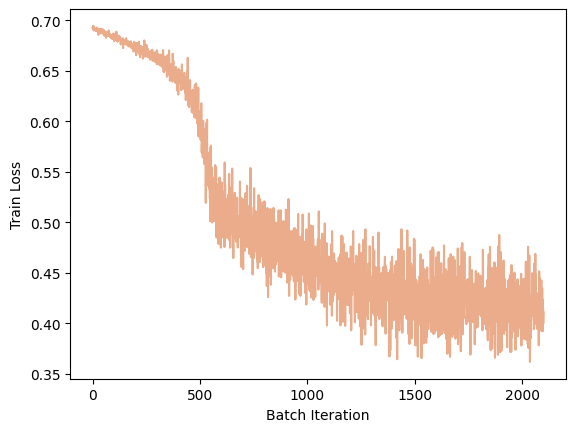

In [83]:
plt.plot([i for i in range(len(all_loss))], all_loss, label="Train")
plt.xlabel('Batch Iteration')
plt.ylabel('Train Loss')
plt.show()

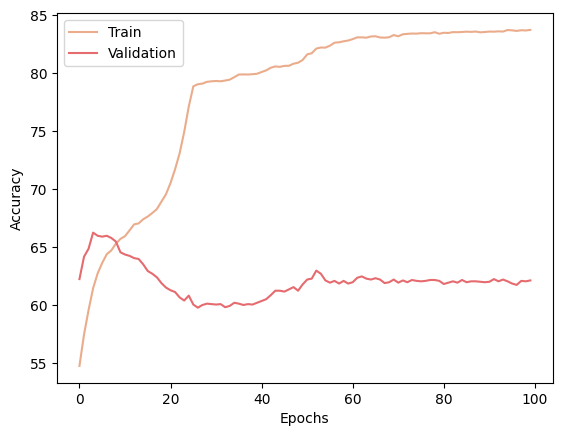

In [84]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## LTSMNN

In [85]:
# Hyperparameters
input_size = X_train.shape[2]
hidden_size = 256  # Number of hidden units in RNN
num_classes = 2 # For two-class classification
epochs = 20
learning_rate = 0.00001
batch_size = 256
landa = 0.00001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(X_train, dtype=t.float32), t.tensor(y_train, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(X_test, dtype=t.float32), t.tensor(y_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.LSTM(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
# rnn_layer2 = nn.LSTM(hidden_size, hidden_size, batch_first=True)
# dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
optimizer = Adam(list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# Training loop
for epoch in range(epochs):
    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        # out, _ = rnn_layer2(out)
        # out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # loss = loss_fn(out, Y) + landa * l2_term
        loss = loss_fn(out, Y)

        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluation on training and validation data
    rnn_layer1.eval()
    # rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            # out, _ = rnn_layer2(out)
            # out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            # out, _ = rnn_layer2(out)
            # out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    # rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()

Epoch 0/20 ---> Train Accuracy: 50.02829121086383%, Validation Accuracy: 26.589595375722542%
Epoch 1/20 ---> Train Accuracy: 50.1131648434553%, Validation Accuracy: 26.589595375722542%
Epoch 2/20 ---> Train Accuracy: 50.35835533760845%, Validation Accuracy: 26.705202312138727%
Epoch 3/20 ---> Train Accuracy: 51.10335722368917%, Validation Accuracy: 28.053949903660886%
Epoch 4/20 ---> Train Accuracy: 53.1308940022633%, Validation Accuracy: 30.48169556840077%
Epoch 5/20 ---> Train Accuracy: 57.223689173896645%, Validation Accuracy: 36.76300578034682%
Epoch 6/20 ---> Train Accuracy: 62.089777442474535%, Validation Accuracy: 42.46628131021195%
Epoch 7/20 ---> Train Accuracy: 66.61637118068653%, Validation Accuracy: 49.98073217726397%
Epoch 8/20 ---> Train Accuracy: 69.8698604300264%, Validation Accuracy: 56.994219653179194%
Epoch 9/20 ---> Train Accuracy: 70.70916635231988%, Validation Accuracy: 60.92485549132948%
Epoch 10/20 ---> Train Accuracy: 69.35118823085628%, Validation Accuracy: 63

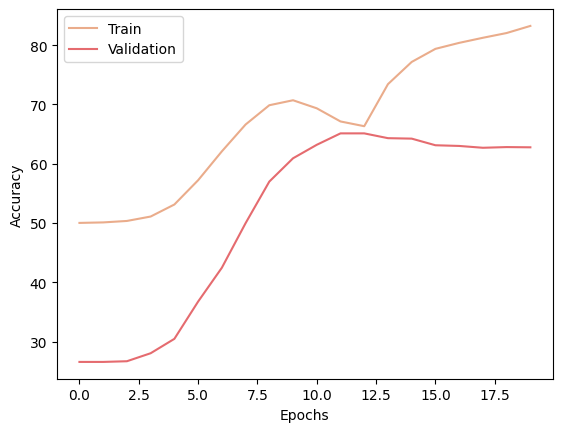

In [86]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()